### Objective  

**Create a classification model to predict TARGET_B (who will donate)**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', None)

> retrieve data

In [10]:
data = pd.read_csv('./cache/2-all_cat_clean.csv')
data

,STATE,MAILCODE,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,NOEXCH,DOMAIN_B,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B,TARGET_D
0,IL,A,XXXX,36,U,F,U,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,C,T,0,2,8901,0,3712,60.000000,1.0,5.0,9.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,9512,8911,4.0,7.741935,95515,0,4,39.0,0,0.0
1,CA,A,XXXX,14,H,M,3,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,A1F,A1F,L1E,A1E,A1E,N1E,N1E,N1E,F1E,L,G,A,S,0,1,9401,1,5202,46.000000,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,

In [11]:
numerical = data.select_dtypes(include=['number'])

In [12]:
target = numerical[['TARGET_D', 'TARGET_B']]
numerical = numerical.drop(columns=['TARGET_D', 'TARGET_B'])

> Look critically at the dtypes of numerical and categorical columns and make changes where appropriate.

In [13]:
numerical

,NOEXCH,DOMAIN_B,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,2,8901,0,3712,60.000000,1.0,5.0,9.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,9512,8911,4.0,7.741935,95515,0,4,39.0
1,0,1,9401,1,5202,46.000000,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,9512,9310,18.0,15.666667,148535,0,2,1.0
2,0,2,9001,1,0,61.611649,3.0,3.0,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10

In [14]:
to_cat = ['NOEXCH', 'DOMAIN_B', 'TCODE', 'DOB', 'INCOME', 'WEALTH1', 'HPHONE_D', 'RFA_2F', 'CLUSTER2']
for col in to_cat:
    data[col] = data[col].astype('object')
# ignoring the date columns

In [15]:
numerical = data.select_dtypes(include=['number'])
categorical = data.select_dtypes(include=['object'])

In [16]:
categorical

,STATE,MAILCODE,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,NOEXCH,DOMAIN_B,TCODE,DOB,INCOME,WEALTH1,HPHONE_D,RFA_2F,CLUSTER2
0,IL,A,XXXX,36,U,F,U,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,C,T,0,2,0,3712,5.0,9.0,0,4,39.0
1,CA,A,XXXX,14,H,M,3,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,A1F,A1F,L1E,A1E,A1E,N1E,N1E,N1E,F1E,L,G,A,S,0,1,1,5202,6.0,9.0,0,2,1.0
2,NC,A,XXXX,43,U,M,3,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,A1F,S4F,S4F,S4F,S4F,S4F,A1E,S4D,S4D,A1E,S4D,S3D,L,E,C,R,0,2,1,0,3.0,1.0,1,4,60.0
3,CA,A,XXXX,44,U,F,3,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,A1F,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1E,L,E,C,R,0,2,0,2801,1.0,4.0,1,4,41.0
4,FL,A,XXXX,16,H,F,3,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,L3D,A2D,A2D,A3D,A3D,I4E,A3D,L,F,A,S,0,2,0,2001,3.0,2.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,A,XXXX,27,U,M,U,L1G,F1G,F1G,A1F,F1G,P1G,P1G,A1F,A1F,A1F,A1F,A1F,A1F,A1E,A1E,A1E,A1E,A1E,A1E,A1E,L,G,C,C,0,2,1,0,6.0,8.0,0,1,12.0
95408,TX,A,XXXX,24,H,M,3,L1F,A1F,A1F,A1F,A1F,P1F,P1F,A1F,A1F,A1F,A1F,A1F,A1F,A1E,A1E,A1E,A1E,A1E,A1E,A1E,L,F,A,C,0,1,1,5001,7.0,9.0,1,1,2.0
95409,MI,A,XXXX,30,U,M,U,L3E,S4E,S4E,S3E,S3E,A1F,A2E,N3E,N3E,N3E,N3E,N3E,N3E,F1D,A1E,F1D,A1E,P1D,P1D,A1E,L,E,B,C,0,3,1,3801,3.0,5.0,1,3,34.0
95410,CA,A,XXXX,24,H,F,2,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S3F,S2F,S2F,A1F,A1F,A1F,S3F,L,F,A,C,0,1,0,4005,7.0,3.0,1,4,11.0


>> categoricals look good

> save

In [17]:
data= pd.concat([numerical, categorical], axis=1)
data

,ODATEDW,AGE,NUMCHLD,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,STATE,MAILCODE,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,NOEXCH,DOMAIN_B,TCODE,DOB,INCOME,WEALTH1,HPHONE_D,RFA_2F,CLUSTER2
0,8901,60.000000,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,9512,8911,4.0,7.741935,95515,0,0.0,IL,A,XXXX,36,U,F,U,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,C,T,0,2,0,3712,5.0,9.0,0,4,39.0
1,9401,46.000000,1.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,

In [18]:
data.to_csv('./cache/3-all_cat_clean.csv', index=False)

> concat numerical and categorical as X, TARGET_B as y

In [19]:
X = pd.concat([numerical, categorical], axis=1)
y = target[['TARGET_B']]
# I will ignore target_D bc it would introduce bias, we want to predict that later on

> split the data into a training set and a test set

In [20]:
# to use previously cleaned data 
# numerical = pd.read_csv('./cleaned_data/numerical.csv', index_col=False)
# categorical = pd.read_csv('./cleaned_data/categorical.csv', index_col=False)
# X = pd.concat([numerical, categorical], axis=1)
# y = target[['TARGET_B']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

> split into num and cat respectively

In [22]:
train_num = X_train.select_dtypes(include=['number'])
train_cat = X_train.select_dtypes(include=['object'])
test_num = X_test.select_dtypes(include=['number'])
test_cat = X_test.select_dtypes(include=['object'])

In [23]:
train_cat

,STATE,MAILCODE,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,NOEXCH,DOMAIN_B,TCODE,DOB,INCOME,WEALTH1,HPHONE_D,RFA_2F,CLUSTER2
79401,other,A,XXXX,24,H,M,3,L3D,S3D,S3D,A1F,S3D,S3D,S3D,S3D,A1F,A1F,S3D,A1F,A1F,A1D,A1E,A1D,L3E,A1E,A1E,A1E,L,D,B,C,0,1,1,2301,4.0,6.0,1,3,32.0
86429,other,A,XXXX,53,H,F,2,L1F,F1F,F1F,A1F,F1F,P1F,P1F,A1F,A1F,A1F,A1F,A1F,A1F,A1E,A1E,A1E,A1E,A1E,A1E,A1E,L,F,C,R,0,3,0,4501,5.0,6.0,0,1,60.0
76729,FL,A,XXXX,33,H,M,3,L3E,S3E,S3E,S3E,S3E,S2D,S2D,S2D,S2D,S2D,S2D,S3D,S3D,S3D,S3D,S3D,S4D,S3D,S3D,S4D,L,E,A,C,0,3,1,3709,5.0,1.0,1,3,49.0
38838,CA,A,XXXX,5,H,M,3,L1F,A1F,A1F,A1F,S2F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,L1G,A1E,L2G,A1G,A1G,A1G,A1G,L,F,A,U,0,2,1,2101,6.0,6.0,1,1,9.0
83012,other,A,XXXX,27,U,F,3,L1F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,A2F,A1E,N2E,N2E,N2E,N2E,N2E,N2E,F1D,L,F,B,C,0,2,3,4301,5.0,2.0,1,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,WI,A,XXXX,12,H,F,3,L2E,S2E,S2E,S2E,S2E,A3F,A3F,A3F,A3F,A3F,A3F,A3F,A3F,A4F,A3E,A3E,A3E,A2E,A2E,A3E,L,E,B,S,0,1,0,2708,3.0,9.0,1,2,4.0
45891,GA,A,XXXX,34,U,F,3,L1F,F1F,F1F,A1F,F1F,P1F,P1F,A1F,A1F,A1F,A1F,A1F,A1F,A1E,A1E,A1E,A1E,A1E,A1E,A1E,L,F,D,T,0,1,2,3201,3.0,6.0,1,1,16.0
42613,other,A,XXXX,46,U,M,U,L4D,S4D,S4D,S4D,S4D,S3E,S3E,S3E,S3E,S3E,S3E,S2E,S2E,A1E,A1E,L2E,L2E,L2E,L2E,A1E,L,D,D,R,0,2,1,0,3.0,4.0,0,4,59.0
43567,FL,A,XXXX,39,H,M,3,L4G,S3G,S3G,S4G,S4G,S3D,S3D,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,A1E,S3E,S2D,L,G,C,T,0,2,1,2107,5.0,3.0,1,4,38.0


In [24]:
test_cat

,STATE,MAILCODE,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,NOEXCH,DOMAIN_B,TCODE,DOB,INCOME,WEALTH1,HPHONE_D,RFA_2F,CLUSTER2
58053,CA,A,XXXX,22,H,F,2,L1F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,L2E,L2E,L3E,L3E,L3E,A1E,L,F,A,C,0,1,28,3208,6.0,1.0,1,1,11.0
9484,MI,A,XXXX,10,H,M,2,L1F,A1F,A1F,A1F,S2F,S2F,S2F,S3F,S3F,S3F,S3F,S3F,S2F,S2E,A1E,S3E,S2D,A1E,S2D,S3D,L,F,A,U,0,4,1,4005,5.0,2.0,0,1,30.0
13395,CA,A,XXXX,14,H,M,3,L1G,A1G,A1G,S2G,S2G,A1F,A1F,S2F,S2F,S2F,S2F,S2F,S2F,A1F,A1F,A1F,A1F,A1F,A1F,A1F,L,G,A,S,0,1,1,5203,7.0,8.0,1,1,5.0
1466,MO,B,XXXX,38,U,F,U,L2E,S2E,S2E,A1F,A1F,A1E,A1E,A1E,A1F,A1F,A1F,A1F,A1E,A1E,S2E,S2E,S2E,S2E,S2E,A1E,L,E,A,T,0,2,0,0,6.0,1.0,0,2,5.0
2076,CA,A,XXXX,39,U,M,3,L1F,F1F,F1F,A1F,F1F,P1F,P1F,A1F,A1F,A1F,A1F,A1F,A1F,A1E,A1E,A1E,A1E,A1E,A1E,A1E,L,F,B,T,0,2,0,5201,3.0,2.0,1,1,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94255,IN,A,XXXX,46,U,M,3,L3E,A3E,A3E,A2E,A2E,A2D,A2D,A2D,A2D,A2D,A2D,A2D,A1D,A1D,A1C,A1C,A1C,A1C,A1C,A1E,L,E,D,R,0,2,2,0,2.0,0.0,1,3,60.0
26449,WI,A,XXXX,30,H,F,3,L2F,A2F,A2F,A2F,A1F,A1F,A1F,L1F,A1F,L1F,L1F,A1F,L1F,L1F,A1F,A1F,A1F,A1F,A1F,A1F,L,F,C,C,0,3,0,3006,5.0,2.0,0,2,11.0
1969,other,A,XXXX,51,H,F,2,L1F,F1F,F1F,A1F,F1F,F1F,F1F,A1F,A1F,P1F,P1F,A1F,A1F,A1E,A1E,A1E,A1E,A1E,A1E,A1E,L,F,D,R,0,3,0,4801,5.0,3.0,0,1,60.0
48574,other,A,XXXX,36,U,F,3,L1E,A1E,A1E,A1F,S2E,S3E,S3E,S3E,S3E,S3E,S3E,S4E,S3E,S2E,S2D,S2D,S2D,S3D,S3D,S3D,L,E,D,T,0,2,0,0,2.0,2.0,1,1,55.0


> scaling numericals

In [25]:
scaler = MinMaxScaler()
scaler.fit(train_num)

scaled_train_num = scaler.transform(train_num)
scaled_train_num = pd.DataFrame(scaled_train_num, columns=train_num.columns)

scaled_test_num = scaler.transform(test_num)
scaled_test_num = pd.DataFrame(scaled_test_num, columns=test_num.columns)

> ordinal cateogoricals

In [26]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(train_cat)

encoded_train_cat = encoder.transform(train_cat)
encoded_test_cat = encoder.transform(test_cat)

encoded_train_cat = pd.DataFrame(encoded_train_cat, columns=train_cat.columns)
encoded_test_cat = pd.DataFrame(encoded_test_cat, columns=test_cat.columns)


> re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test

In [27]:
X_train = pd.concat([scaled_train_num, encoded_train_cat], axis=1)
X_test = pd.concat([scaled_test_num, encoded_test_cat], axis=1)

> fit logistic regression model

In [28]:
# y_train = y_train.values.ravel()
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
accuracy = logistic_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.947702143268878


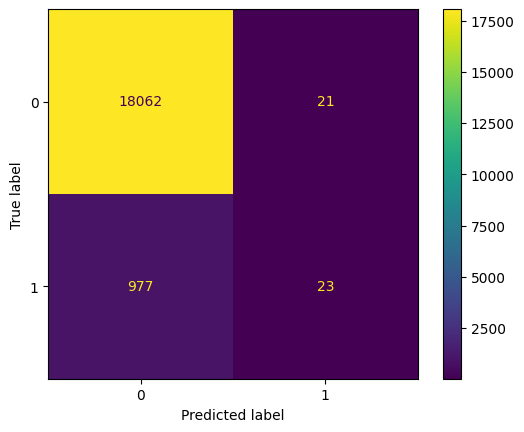

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = logistic_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
cm_display.plot()